# Tarea 1

**Envío del PR inicial: 24.08.2018** 

**Aceptación del PR: 02.09.2018** 

## 1

- Escriban una función `newton` que, a partir de `f`, `fprime` y `x0` dados, obtenga una de las raices de la ecuación. Comprueben que funciona con $f(x)=x^2 -2$ y $f'(x) = 2x$. Tengan suficiente cuidado para que no haya ningún tipo de inestabilidad de tipo en su función.

- Documenta la función de manera adecuada (*docstrings*).

- ¿Cómo se comporta, en términos del número de iterados, la convergencia del método de Newton?

#### *Definición y documentación de la función*:

Para implementar el método unidimensional, se puede hacer lo siguiente:

In [1]:
"""
    newton(f, fprime, x0, número_iteraciones)

`newton` es una implementación unidimensional real del método de Newton para encontrar raíces. 

# Argumentos

Para poder utilizar la función se requieren los siguientes argumentos:

* `f`, la función real de variable real de la que se quiere buscar una raíz (un punto \$ a \$ tales que \$ f(a) = 0 \$),
* `f_prime`, la función derivada de `f`, y,
* `x0`, una adivinanza inicial sobre la posición de la raíz.

Opcionalmente, se puede especificar lo siguiente:

* `número_iteraciones`, el número de iteraciones a realizar. (Por defecto está configurado en 10000 iteraciones.)

`newton` requiere que tanto `f` como `fprime` sean funciones, que `x0` sea un real y que `número_iteraciones` sea un número entero. `x0`, en particular, siempre es convertida a un número flotante para mejorar la estabilidad de tipo.

# Ejemplos
```julia-repl
    julia > newton(x -> x^2 - 2, x -> 2*x, 2, 5)
    1.4142135623730951

    julia > newton(x -> x^2 - 2, x -> 2*x, 1.4, 100)
    1.414213562373095

    julia > newton(x -> x^2 - 2, x -> 2*x, φ, 1)
    1.4270509831248424

    julia > newton(x -> x^2 - 2, x -> 2*x, φ, 10)
    1.414213562373095    
```
"""
function newton(f::Function, fprime::Function, x0::Real, número_iteraciones::Int = 10000)
    
    punto_actual = float(x0)
    
    for i in 1:número_iteraciones
        punto_actual -= f(punto_actual)/fprime(punto_actual)
    end
    
    return(punto_actual)
end

newton

#### *Ejemplo del cálculo de √2*:

Considerando las funciones $f(x) = x^ 2 - a$ y $g(x) = f'(x) = 2x$ se tiene que si $a \geq 0$, el método de Newton puede encontrar aproximaciones a las raíces cuadradas de $a$ según la adivinanza inicial otorgada.

In [2]:
#Generando el ejemplo con los siguientes parámetros:

f(x) = x^2 - 2
g(x) = 2*x
x0 = 1.5
iteraciones = 10

#La aproximación a la raíz cuadrada positiva de 2 calculada con el método es:

@show raíz_newton = newton(f, g, x0, iteraciones)

#Que el número calculado sea una aproximación a la raíz positiva es resultado de la elección de x0.
#La aproximación a la raíz cuadrada (positiva) de 2 calculada con la función sqrt es:

@show raíz = sqrt(2)

#Comparando si son iguales como números flotantes de 64 bits:

@show raíz_newton == raíz

raíz_newton = newton(f, g, x0, iteraciones) = 1.4142135623730951
raíz = sqrt(2) = 1.4142135623730951
raíz_newton == raíz = true


true

Por lo que el método implementado calculó correctamente la raíz cuadrada positiva de 2 como número flotante de 64 bits con 10 iteraciones, con la adivinanza inicial igual a 1.5.

#### *Análisis de la estabilidad de tipo*:
Para ver la estabilidad de tipo en un ejemplo, basta con usar el macro `@code_warntype` en la llamada a la función:

In [3]:
#Para el análisis se consideran las funciones y el número de iteraciones definidas para el ejemplo anterior. Lo que se va a modificar va a ser el tipo de adivinanza inicial suministrada.

x0 = 1.5 #Lo mismo que en el ejemplo anterior. 
@show typeof(x0) #Número flotante de 64 bits.

@code_warntype newton(f, g, x0, iteraciones)

typeof(x0) = Float64
Variables:
  #self# <optimized out>
  f <optimized out>
  fprime <optimized out>
  x0::Float64
  número_iteraciones::Int64
  i <optimized out>
  #temp#::Int64
  punto_actual::Float64

Body:
  begin 
      punto_actual::Float64 = x0::Float64 # line 39:
      SSAValue(2) = (Base.select_value)((Base.sle_int)(1, número_iteraciones::Int64)::Bool, número_iteraciones::Int64, (Base.sub_int)(1, 1)::Int64)::Int64
      #temp#::Int64 = 1
      5: 
      unless (Base.not_int)((#temp#::Int64 === (Base.add_int)(SSAValue(2), 1)::Int64)::Bool)::Bool goto 14
      SSAValue(3) = #temp#::Int64
      SSAValue(4) = (Base.add_int)(#temp#::Int64, 1)::Int64
      #temp#::Int64 = SSAValue(4) # line 40:
      punto_actual::Float64 = (Base.sub_float)(punto_actual::Float64, (Base.div_float)((Base.sub_float)((Base.mul_float)(punto_actual::Float64, punto_actual::Float64)::Float64, (Base.sitofp)(Float64, 2)::Float64)::Float64, (Base.mul_float)((Base.sitofp)(Float64, 2)::Float64, punto_actual::Fl

In [4]:
#El macro no emitió advertencias. Intentando con un entero:

x0 = 2
@show typeof(x0) #Número entero de 64 bits.

@code_warntype newton(f, g, x0, iteraciones)

typeof(x0) = Int64
Variables:
  #self# <optimized out>
  f <optimized out>
  fprime <optimized out>
  x0::Int64
  número_iteraciones::Int64
  i <optimized out>
  #temp#::Int64
  punto_actual::Float64

Body:
  begin 
      punto_actual::Float64 = (Base.sitofp)(Float64, x0::Int64)::Float64 # line 39:
      SSAValue(2) = (Base.select_value)((Base.sle_int)(1, número_iteraciones::Int64)::Bool, número_iteraciones::Int64, (Base.sub_int)(1, 1)::Int64)::Int64
      #temp#::Int64 = 1
      5: 
      unless (Base.not_int)((#temp#::Int64 === (Base.add_int)(SSAValue(2), 1)::Int64)::Bool)::Bool goto 14
      SSAValue(3) = #temp#::Int64
      SSAValue(4) = (Base.add_int)(#temp#::Int64, 1)::Int64
      #temp#::Int64 = SSAValue(4) # line 40:
      punto_actual::Float64 = (Base.sub_float)(punto_actual::Float64, (Base.div_float)((Base.sub_float)((Base.mul_float)(punto_actual::Float64, punto_actual::Float64)::Float64, (Base.sitofp)(Float64, 2)::Float64)::Float64, (Base.mul_float)((Base.sitofp)(Float64, 2)

In [5]:
#El macro tampoco emitió advertencias. Intentando con un irracional:

x0 = φ #El número áureo
@show typeof(x0) #Número irracional

@code_warntype newton(f, g, x0, iteraciones)

typeof(x0) = Irrational{:φ}
Variables:
  #self# <optimized out>
  f <optimized out>
  fprime <optimized out>
  x0 <optimized out>
  número_iteraciones::Int64
  i <optimized out>
  #temp#::Int64
  punto_actual::Float64

Body:
  begin 
      punto_actual::Float64 = 1.618033988749895 # line 39:
      SSAValue(2) = (Base.select_value)((Base.sle_int)(1, número_iteraciones::Int64)::Bool, número_iteraciones::Int64, (Base.sub_int)(1, 1)::Int64)::Int64
      #temp#::Int64 = 1
      5: 
      unless (Base.not_int)((#temp#::Int64 === (Base.add_int)(SSAValue(2), 1)::Int64)::Bool)::Bool goto 14
      SSAValue(3) = #temp#::Int64
      SSAValue(4) = (Base.add_int)(#temp#::Int64, 1)::Int64
      #temp#::Int64 = SSAValue(4) # line 40:
      punto_actual::Float64 = (Base.sub_float)(punto_actual::Float64, (Base.div_float)((Base.sub_float)((Base.mul_float)(punto_actual::Float64, punto_actual::Float64)::Float64, (Base.sitofp)(Float64, 2)::Float64)::Float64, (Base.mul_float)((Base.sitofp)(Float64, 2)::Float

In [6]:
#Tampoco emitió advertencias, esto debido al comportamiento de un irracional ante la función float(): se toma la representación como número flotante de 64 bits más cercana a dicho irracional. 

float(φ)

1.618033988749895

Estos ejemplos otorgan evidencia sobre la estabilidad de tipo de la función implementada. En todos los ejemplos se devolvió un número flotante de 64 bits.

#### Análisis de la convergencia:

Para analizar la convergencia del método, consideremos el ejemplo en el que se calcula una aproximación a la raíz cuadrada de dos con una adivinanza inicial constante. ¿Cómo cambia la diferencia entre el valor dado por Julia y el valor calculado con el método de Newton según el número de iteraciones?

Para hacer esto de forma automática y así poder graficar, conviene definir:

* Una función que otorgue la diferencia entre el valor de la raíz cuadrada de un número $a$ calculada por el método de Newton implementado y el valor de la misma raíz cuadrada calculada por Julia con una adivinanza inicial fija y un número de iteraciones dado.
    
* Un conjunto de valores de esta diferencia para diferentes cantidades de iteraciones.

In [7]:
"""
    diferencia_raíz_cuadrada(a, x0, número_iteraciones)

`diferencia_raíz cuadrada` calcula el valor absoluto de la diferencia entre el valor de la raíz cuadrada positiva del número \$ a \$ calculada mediante la función `sqrt` implementada en Julia y el valor de la misma raíz cuadrada calculada mediante el método de Newton.

# Argumentos

Para poder utilizar la función se requieren los siguientes argumentos:

* `a`, el número del que se está calculando la raíz,
* `x0`, una adivinaza de la raíz (positiva) de \$ a \$, y, 
* `número_iteraciones`, el número de iteraciones realizadas en el método de Newton para calcular la raíz.

#Ejemplos:
```julia-repl
    julia> diferencia_raíz_cuadrada(2, 2, 1)
    -0.08578643762690485

    julia> diferencia_raíz_cuadrada(2, 2, 3)
    -2.1239014147411694e-6

    julia> diferencia_raíz_cuadrada(π, 1.5, 1)
    -0.02474370029108175

    julia> diferencia_raíz_cuadrada(π, 1.5, 3)
    -8.183899780078718e-9
```
"""
function diferencia_raíz_cuadrada(a::Real, x0::Number, número_iteraciones::Int)
    
    raíz_cuadrada_newton = newton(x -> x^2 - a, x -> 2*x, x0, número_iteraciones)
    raíz_julia = sqrt(a)
    
    diferencia = raíz_julia - raíz_cuadrada_newton
    valor_absoluto = abs(diferencia)
    
    return(valor_absoluto)
end

diferencia_raíz_cuadrada

In [8]:
#El conjunto de números de iteraciones para el cálculo muestra será de la forma: 

conjunto_iteraciones = 1:10

#Generando el conjunto de valores para analizar lo que sucede. Se ocupa:

x0 = 100

#Esto debido a que se quiere evitar que la diferencia sea cero para poder usar una gráfica semilogarítimica para visualizar los datos:

valores_raíz_newton = [diferencia_raíz_cuadrada(2, x0, i) for i in conjunto_iteraciones]

10-element Array{Float64,1}:
 48.5958    
 23.6108    
 11.1382    
  4.94168   
  1.92107   
  0.553252  
  0.0777873 
  0.00202777
  1.45168e-6
  7.4496e-13

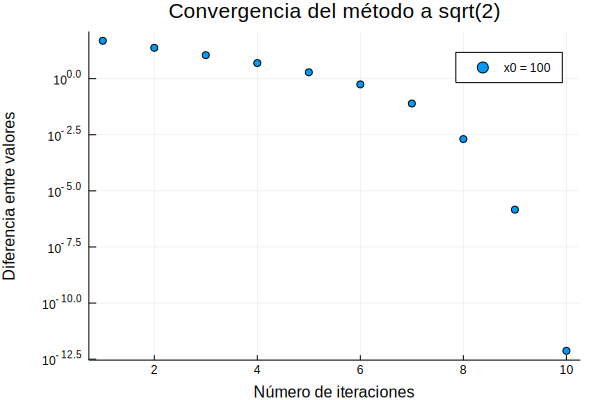

In [9]:
#Se requiere cargar la siguiente paquetería:

using Plots

scatter(valores_raíz_newton, title = "Convergencia del método a sqrt(2)", label = "x0 = $x0", yscale = :log10, xlabel = "Número de iteraciones", ylabel = "Diferencia entre valores")

Como se puede observar en la gráfica, al inicio de este ejemplo la convergencia del método es exponencial, y esta se acelera conforme aumenta el número de pasos. Esto se deduce de lo siguiente: sea $ y = A\exp(kx)$ con $ A > 0 $, entonces, $ \ln y = k x + \ln A$. Esta última ecuación significa que una tendencia exponencial en una gráfica semilogarítmica con la escala logarítmica en la ordenada se visualiza como una línea recta. El cambio de comportamiento al final del ejemplo corresponde a un cambio en la velocidad de convergencia del método, en particular, dado que el cambio en el valor es mayor por paso, la convergencia se acelera. La convergencia total es más rápida que la convergencia exponencial definida por los primeros pasos del método.

Esto, debe señalarse, debe de ser tomado como un ejemplo y no una demostración formal de la tasa de convergencia del método, en específico, porque la forma en la que se estudia la convergencia está limitada por el tipo de representación de los números usados en memoria y porque no se toman números arbitrarios para el estudio.

## 2

- Usando la función que hicieron en el ejercicio anterior y variando la condición inicial `x0`, de -3 a 3 con pasos suficientemente pequeños, por ejemplo `0.125`, grafiquen la dependencia de la raíz encontrada de la condición inicial para $f(x)=x^2-2$. Para hacer esto, vale la pena que guarden en un vector la raíz obtenida y en otro la condición inicial.

- Repitan el inciso anterior para $g(x) = (x-1)(x-2)(x-3)$, considerando el intervalo $x_0\in[1,3]$ y muchas condiciones iniciales.

In [10]:
"""
    comparación_valores(f, fprime, valor_inicial, valor_final, paso_valores, iteraciones_iniciales, iteraciones_finales, paso_iteraciones; legend)

`comparación_valores` es una función que muestra en una misma gráfica el valor de las raíces obtenidas de la implementación del método de Newton en una muestra de puntos iniciales, así como los valores obtenidos de dicho método al variar el número de iteraciones usadas en el mismo. Para modificar la leyenda de la gráfica se utilizan los mismos argumentos que en la función `plot`; por defecto, la leyenda se muestra en la esquina superior izquierda.

# Argumentos

Para poder utilizar la función se requieren los siguientes argumentos:

* `f`, la función real de variable real de la que se quiere buscar una raíz,
* `f_prime`, la función derivada de `f`,
* `valor_inicial`, la cota inferior del intervalo del cual se toma \$ x_0 \$,
* `valor_final`, la cota superior del intervalo del cual se toma \$ x_0 \$,
* `paso_valores`, la distancia entre las muestras de \$ x_0 \$ a considerar,
* `iteraciones_iniciales`, el número de iteraciones mínimo a usar,
* `iteraciones_finales`, el número de iteraciones máximo a usar, y,
* `paso_iteraciones`, la distancia entre las iteraciones a considerar.

Un argumento optativo es:

* `legend`, que ocupa los mismos *keyword arguments* de la función `plot` para modificar la posición de la leyenda en la gŕafica.

`comparación_valores` requiere que tanto `f` como `fprime` sean funciones; que `valor_inicial`, `valor_final` y `paso_valores`  sean reales; y que `iteraciones_iniciales`, `iteraciones_finales` y `paso_iteraciones` sean un números enteros. `valor_inicial`, `valor_final` y `paso_valores` en particular son convertidos en números flotantes de 64 bits.

# Ejemplo:

Si se desean visualizar los valores de las raíces de la función `x -> x^2 - 2`  dadas por el método de Newton en el intervalo \$ [0,1]  \$ con paso de 0.01 con 3, 5 y 7 iteraciones se puede usar el comando:
```julia-repl
    julia > comparación_valores(x -> x^2 - 2, x -> 2*x, 0, 1, 0.01, 3, 7, 2)
```
"""
function comparación_valores(f::Function, fprime::Function, valor_inicial::Real, valor_final::Real, paso_valores::Real, iteraciones_iniciales::Int, iteraciones_finales::Int, paso_iteraciones::Int; legend = :topleft)
    
    valor_inicial_flotante = float(valor_inicial)
    valor_final_flotante = float(valor_final)
    paso_valores_flotante = float(paso_valores)
    puntos_muestra = valor_inicial_flotante:paso_valores:valor_final_flotante
    gráfica = plot()

    for i in iteraciones_iniciales:paso_iteraciones:iteraciones_finales
        
        valores_raíz_iteraciones_i = []
        
        for j in puntos_muestra
            
            raíz = newton(f, fprime, j, i)
    
            push!(valores_raíz_iteraciones_i, raíz)
        end
        
        plot!(gráfica, puntos_muestra, valores_raíz_iteraciones_i, title = "Comparación del valor de la raíz según la posición inicial", xlabel = "x0", ylabel = "Raíz calculada", label = "iteraciones = $i", legend = legend)
    end

    return(gráfica)
end

comparación_valores

Para realizar el estudio para $f(x) = x^2 - 2$, (re)definamos las siguientes funciones:

In [11]:
f(x) = x^2 - 2
fprime(x) = 2*x

fprime (generic function with 1 method)

Haciendo la comparación solicitada:

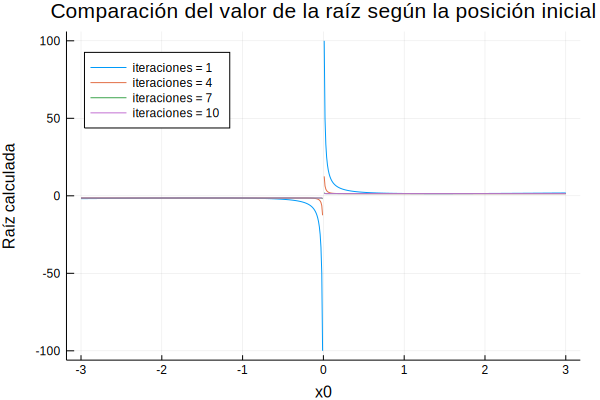

In [12]:
valor_inicial = -3
valor_final = 3
paso_valores = 0.01
iteraciones_iniciales = 1
iteraciones_finales = 10
paso_iteraciones = 3

comparación_raíz_1 = comparación_valores(f, fprime, valor_inicial, valor_final, paso_valores, iteraciones_iniciales, iteraciones_finales, paso_iteraciones)

Como se puede ver, conviene redimensionar el área que se muestra en la gráfica:

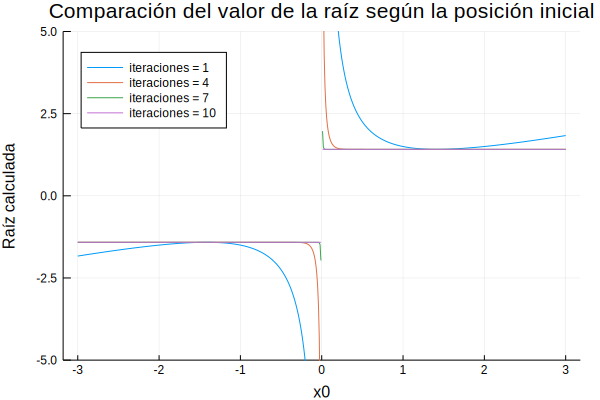

In [13]:
plot!(comparación_raíz_1, ylim = (-5, 5))

Como se puede observar, a mayor número de iteraciones, el método mejora su convergencia a los valores conocidos de las raíces a lo largo de los diferentes valores de $x_0$ mostrados. Los "picos" observados en torno a $x_0 = 0$ corresponden al cambio de la raíz que arroja el método (de la raíz negativa a la raíz positiva). La forma de estos picos es explicada por el hecho de que $x_0 = 0$ es un punto crítico de $f$, lo que indetermina el cociente al dar un paso con el método. Obsérvese que la velocidad de convergencia en torno a $x_0 \approx \pm \sqrt 2$ es máxima (las curvas generadas de considerar diferentes números de iteraciones son más cercanas en estas regiones).

Para realizar el estudio para $g(x) = (x-1)(x-2)(x-3)$, (re)definamos las siguientes funciones:

In [14]:
g(x) = (x-1)*(x-2)*(x-3)
gprime(x) = (x-2)*(x-3) + (x-1)*(x-3) + (x-1)*(x-2)

gprime (generic function with 1 method)

Haciendo la comparación solicitada:

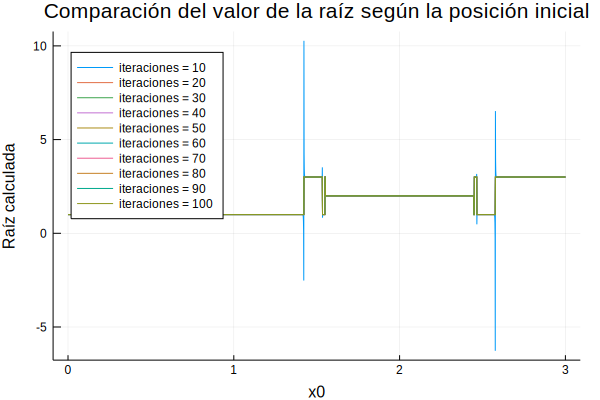

In [15]:
valor_inicial = 0
valor_final = 3
paso_valores = 0.001
iteraciones_iniciales = 10
iteraciones_finales = 100
paso_iteraciones = 10

comparación_raíz_2 = comparación_valores(g, gprime, valor_inicial, valor_final, paso_valores, iteraciones_iniciales, iteraciones_finales, paso_iteraciones)

En el caso de la función $ g(x) $ se observa, salvo en el caso en el que se tomaron 10 iteraciones en cada punto, que existe una convergencia rápida a valores específicos dentro de la "malla" de puntos iniciales; sin embargo, existen ciertas regiones, aparentemente puntuales, en las que hay un comportamiento que no se ajusta al comportamiento general de la gráfica (valores constantes de la raíz calculada en intervalos "más o menos" grandes). 

Haciendo una gráfica más detallada de sólo los resultados producto de 100 iteraciones de cada punto, se puede visualizar de forma más sencilla este hecho:

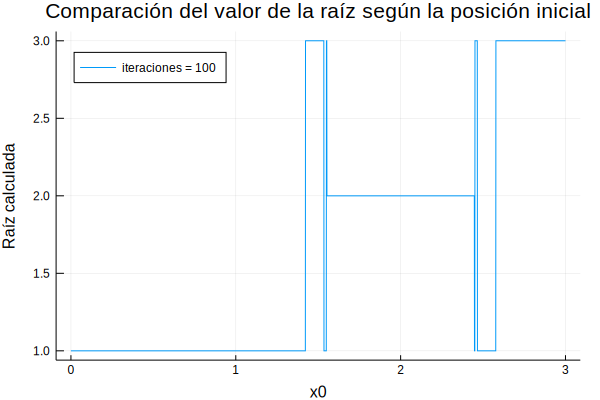

In [16]:
valor_inicial = 0
valor_final = 3
paso_valores = 0.001
iteraciones_iniciales = 100
iteraciones_finales = 100
paso_iteraciones = 1

comparación_raíz_2_detalle = comparación_valores(g, gprime, valor_inicial, valor_final, paso_valores, iteraciones_iniciales, iteraciones_finales, paso_iteraciones)

Como se puede ver, de manera burda, existen cinco intervalos visibles del conjunto de puntos muestra en la gráfica anterior en los que cambia el valor de la raíz calculada. En todos los casos, salvo en los que existen cambios en el valor predicho de la raíz, se obtienen los valores esperados de las raíces de la función $ g(x) $ ($ x_0  = 1, 2, 3$). Existen cuatro puntos en torno a $ x_0 = 1.5 $ y $ x_0 = 2.4 $ que generan un comportamiento que aparenta ser muy localizado. Realizando un estudio detallado de estos puntos, como el mostrado a continuación, se notará que en realidad este comportamiento no es puntual como se puede pensar en primera aproximación, sino que son efectos de la malla de puntos muestra usada para generar la gráfica. Esto quiere decir que, en principio, son nueve los intervalos "visibles" con esta malla de puntos iniciales en los que se aprecia un cambio de resultado.

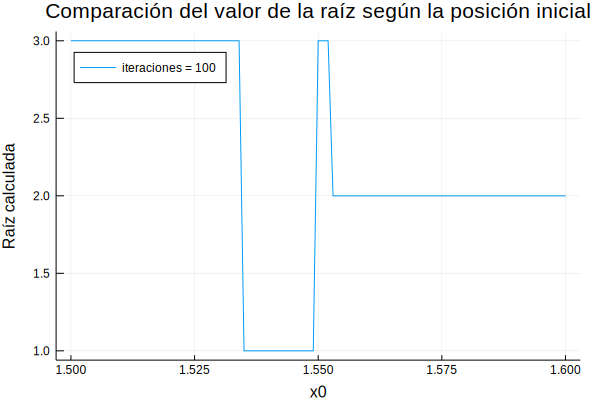

In [17]:
valor_inicial = 1.5
valor_final = 1.6
paso_valores = 0.001
iteraciones_iniciales = 100
iteraciones_finales = 100
paso_iteraciones = 1

comparación_raíz_2_detalle_puntos_1 = comparación_valores(g, gprime, valor_inicial, valor_final, paso_valores, iteraciones_iniciales, iteraciones_finales, paso_iteraciones)

De la gráfica anterior, resulta evidente que cerca de $x_0 = 1.530$ y de $x_0 = 1.550$ en efecto existen intervalos ("pequeños") de puntos que arrojan un resultado distinto al que se espera de los intervalos que les rodean, pero que entran dentro de los valores esperados para las raíces. La inclinación de las líneas en torno de estos puntos no es resultado de predicciones de raíces inesperadas de forma analítica, sino un efecto de la finitud de los puntos usados para graficar. (Una nota interesante: si se mejora la resolución de la malla en aproximadamente diez veces, en esta gráfica se encuentra ¡otro "pico" de valores que no se observa en la actual! Esto de contar intervalos en los que se aprecia o no una uniformidad de comportamiento es dependiente de la "fineza" de la malla.)

Para el otro punto en el que se aprecia un comportamiento similar ($x_0 = 2.4$): 

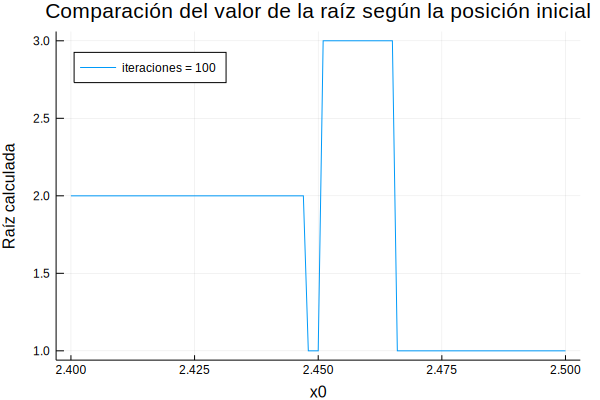

In [18]:
valor_inicial = 2.4
valor_final = 2.5
paso_valores = 0.001
iteraciones_iniciales = 100
iteraciones_finales = 100
paso_iteraciones = 1

comparación_raíz_2_detalle_puntos_2 = comparación_valores(g, gprime, valor_inicial, valor_final, paso_valores, iteraciones_iniciales, iteraciones_finales, paso_iteraciones)

Todos los comentarios realizados para el primer detalle en torno a $ x_0 = 1.5 $ se mantienen para esta gráfica, salvo la posición de los valores en los que cambia el comportamiento de la misma: $x_0 = 2.445$ y $ x_0 = 2.465 $. Esto también incluye lo mencionado sobre el "pico" no visible con esta resolución. Otro comentario importante es que esta gráfica se comporta como la reflexión especular respecto al eje $ y $ de la reflexión especular en torno al eje $ x $ de la gráfica anterior.
 
Como punto final, y para tratar de entender la existencia de estos picos tan "pequeños", conviene graficar la función y sus primeras dos derivadas:

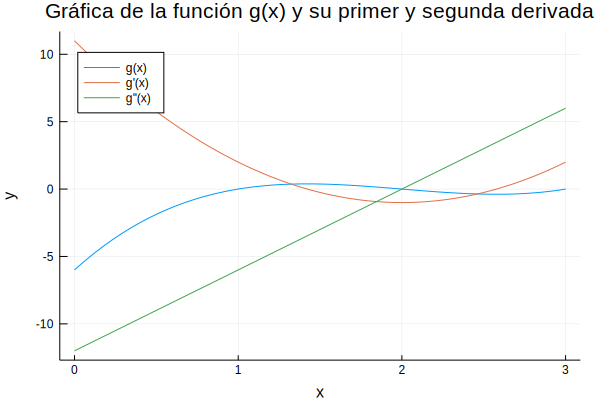

In [19]:
#Definiendo la segunda derivada:
gdoubleprime(x) = 6*x - 12

#Procediendo a graficar:
valor_inicial = 0
valor_final = 3
paso_valores = 0.001
dominio = valor_inicial:paso_valores:valor_final

gráfica_g = plot(dominio, g, label = "g(x)")
plot!(gráfica_g, dominio, gprime, label = "g'(x)")
plot!(gráfica_g, dominio, gdoubleprime, label = "g''(x)", xlabel = "x", ylabel = "y", title = "Gráfica de la función g(x) y su primer y segunda derivada", legend = :topleft)

Como se puede ver en la gráfica de la función, las tres raíces analíticas esperadas en efecto son raíces de la función. Más aún, la derivada se anula en torno a los puntos en los que se detecta un comportamiento "puntual" de la función: esto permite explicar el por qué este comportamiento "errático" ocurre en la vecindad de estos puntos. Finalmente, el hecho de la "doble reflexión especular" en torno a estos puntos con "comportamiento errático" se puede explicar debido al cambio de signo de la segunda derivada en el sitio en el que se situaría el origen de los espejos (en torno a $ x_0 = 1.8$, visible en la primer gráfica de las raíces de la función $g(x)$), lo que responde a un cambio en la curvatura de la función $ g(x)$: en lugar de que la derivada disminuya conforme se avanza en $ x $, como ocurre antes del punto de inflexión comentado, la derivada aumenta conforme se avanza en $x$, lo que cambia la forma en la que las raíces van apareciendo en la gráfica inicial.

## 3

Considerando la función $h(z)=z^3-c$, con $z\in\mathbb{C}$ y $c=1$, utiliza el método de Newton para encontrar las raices en el plano complejo de dicha ecuación. Repite el ejercicio de la dependencia de la raíz encontrada de las condiciones iniciales, graficando en el plano de Argand.

## 4

- Definan una función `derivada_derecha` que calcule *numéricamente* la derivada de una función $f(x)$ de una variable (a priori arbitaria), en un punto $x_0$. Para esto, utilizaremos la aproximación de la derivada
que se basa en su definición:

$$ 
f'(x_0) \approx \frac{\Delta f_+}{\Delta x} \equiv \frac{f(x_0+h)-f(x_0)}{h},
$$

lo que requiere de la especificación de `h`. (Este método también se conoce por el nombre de *diferencias finitas*.)

- A fin de simular el $\lim_{h\to 0}$, consideren distintos valores de $h$ que precisamente simulen dicho límite. Para cada valor de $h$ calculen el error absoluto del cálculo numérico respecto al valor *exacto*. Ilustren esto en una gráfica del error vs $h$, para $f(x) = 3x^3-2$, en $x_0=1$. 

## 5

- Repitan el ejercicio anterior (escribe una función `derivada_simetrica`, usando ahora la aproximación *simétrica* (respecto a la ocurrencia de $h$) de la derivada, dada por

$$
f'(x_0) \approx \frac{ \Delta f_{sym}}{\Delta x} = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}.
$$

- ¿Por qué es correcto afirmar que la derivada simétrica resulta en una mejor aproximación que la derivada derecha? Argumenten y si es necesario usen argumentos analíticos.

## 6

- Definan la función `derivada_compleja` considerando la definición de la derivada dada por:
$$
f'(x_0) \approx \frac{\Delta f_{cmplx}(x_0)}{\Delta x} = \Im\Big(\frac{f(x_0+ i h)}{h}\Big),
$$
donde $\Im$ indica la parte imaginaria del argumento ($i=\sqrt{-1}$). 

- Argumenta (analíticamente) por qué esta definición da tan buen resultado. ¿Hay algún caso en que esta definición puede dar resultados inesperados?